In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib

train = pd.read_csv("random_tree_data/train_data.csv")
test = pd.read_csv("random_tree_data/test_data.csv")

### Defining used columns and target classes

In [3]:
print(train.columns)
features = ['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
            'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
            'systolic', 'relaxation', 'fasting_blood_sugar', 'cholesterol',
            'triglyceride', 'hdl', 'ldl', 'hemoglobin', 'urine_protein',
            'serum_creatinine', 'ast', 'alt', 'gtp', 'dental_caries', 'tartar',
            'bmi', 'healthy_weight', 'eyesight_total', 'vision', 'hearing_impairment']
classNames=["not smoking","smoking"]
Y_train = train["smoking"]
X_train = train[features]
X_train

Index(['gender', 'age', 'height(cm)', 'weight(kg)', 'waist(cm)',
       'eyesight(left)', 'eyesight(right)', 'hearing(left)', 'hearing(right)',
       'systolic', 'relaxation', 'fasting_blood_sugar', 'cholesterol',
       'triglyceride', 'hdl', 'ldl', 'hemoglobin', 'urine_protein',
       'serum_creatinine', 'ast', 'alt', 'gtp', 'dental_caries', 'tartar',
       'smoking', 'bmi', 'healthy_weight', 'eyesight_total', 'vision',
       'hearing_impairment'],
      dtype='object')


,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,ast,alt,gtp,dental_caries,tartar,bmi,healthy_weight,eyesight_total,vision,hearing_impairment
0,1,25,170,75,89.0,1.0,1.0,1.0,1.0,110.0,...,35.0,53.0,61.0,1,1,25.95,1.0,2.0,1,0
1,1,50,170,85,90.0,1.2,1.2,1.0,1.0,115.0,...,40.0,47.0,44.0,0,1,29.41,1.0,2.4,1,0
2,0,45,150,60,81.2,0.6,0.5,1.0,1.0,121.0,...,33.0,57.0,36.0,0,1,26.67,1.0,1.1,1,0
3,1,45,160,65,87.0,1.0,1.2,1.0,1.0,133.0,...,43.0,52.0,61.0,0,1,25.39,1.0,2.2,1,0
4,1,40,180,80,86.0,1.2,0.9,1.0,1.0,112.0,...,15.0,16.0,31.0,0,1,24.69,0.0,2.1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44548,0,40,170,75,84.0,0.1,0.2,1.0,1.0,116.0,...,33.0,43.0,46.0,0,0,25.95,1.0,0.3,3,0
44549,1,40,175,65,80.0,1.2,1.0,1.0,1.0,136.0,...,21.0,22.0,26.0,0,0,21.22,0.0,2.2,1,0
44550,0,60,150,50,77.0,0.9,0.9,1.0,1.0,108.0,...,24.0,23.0,25.0,1,1,22.22,0.0,1.8,1,0
44551,1,35,180,95,101.0,0.9,1.0,1.0,1.0,137.0,...,16.0,22.0,35.0,0,1,29.32,1.0,1.9,1,0


In [4]:
### Fitting our split data into the model

In [5]:
model = RandomForestClassifier(random_state=1337,n_estimators = 100)
model.fit(X_train, Y_train)

RandomForestClassifier(random_state=1337)

In [6]:
X_test = pd.get_dummies(test[features])
X_test.count()
features=X_train.columns

In [7]:
predictions = model.predict(X_test)
accuracy_score(test["smoking"], predictions)

0.8371487566208816

In [8]:
report = classification_report(test["smoking"], predictions)
print(report)

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7060
           1       0.77      0.80      0.78      4079

    accuracy                           0.84     11139
   macro avg       0.82      0.83      0.83     11139
weighted avg       0.84      0.84      0.84     11139



In [9]:
confmatrix=confusion_matrix(test["smoking"], predictions)
print(confmatrix)

[[6067  993]
 [ 821 3258]]


In [10]:
model = RandomForestClassifier(random_state=1337, n_estimators=10)
model.fit(X_train, Y_train)
X_test = pd.get_dummies(test[features])
X_test.count()
features = X_train.columns
predictions = model.predict(X_test)
accuracy_score(test["smoking"], predictions)
report = classification_report(test["smoking"], predictions)
confmatrix=confusion_matrix(test["smoking"], predictions)
print(report)
print(confmatrix)

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      7060
           1       0.76      0.69      0.72      4079

    accuracy                           0.81     11139
   macro avg       0.79      0.78      0.79     11139
weighted avg       0.80      0.81      0.80     11139

[[6161  899]
 [1265 2814]]


In [11]:
decision_tree = DecisionTreeClassifier(max_depth = 3)
treemodel = decision_tree.fit(X_train, Y_train)

In [12]:
predictions_tree = treemodel.predict(X_test)

In [13]:
accuracy_score(test["smoking"], predictions_tree)

0.7200825926923422

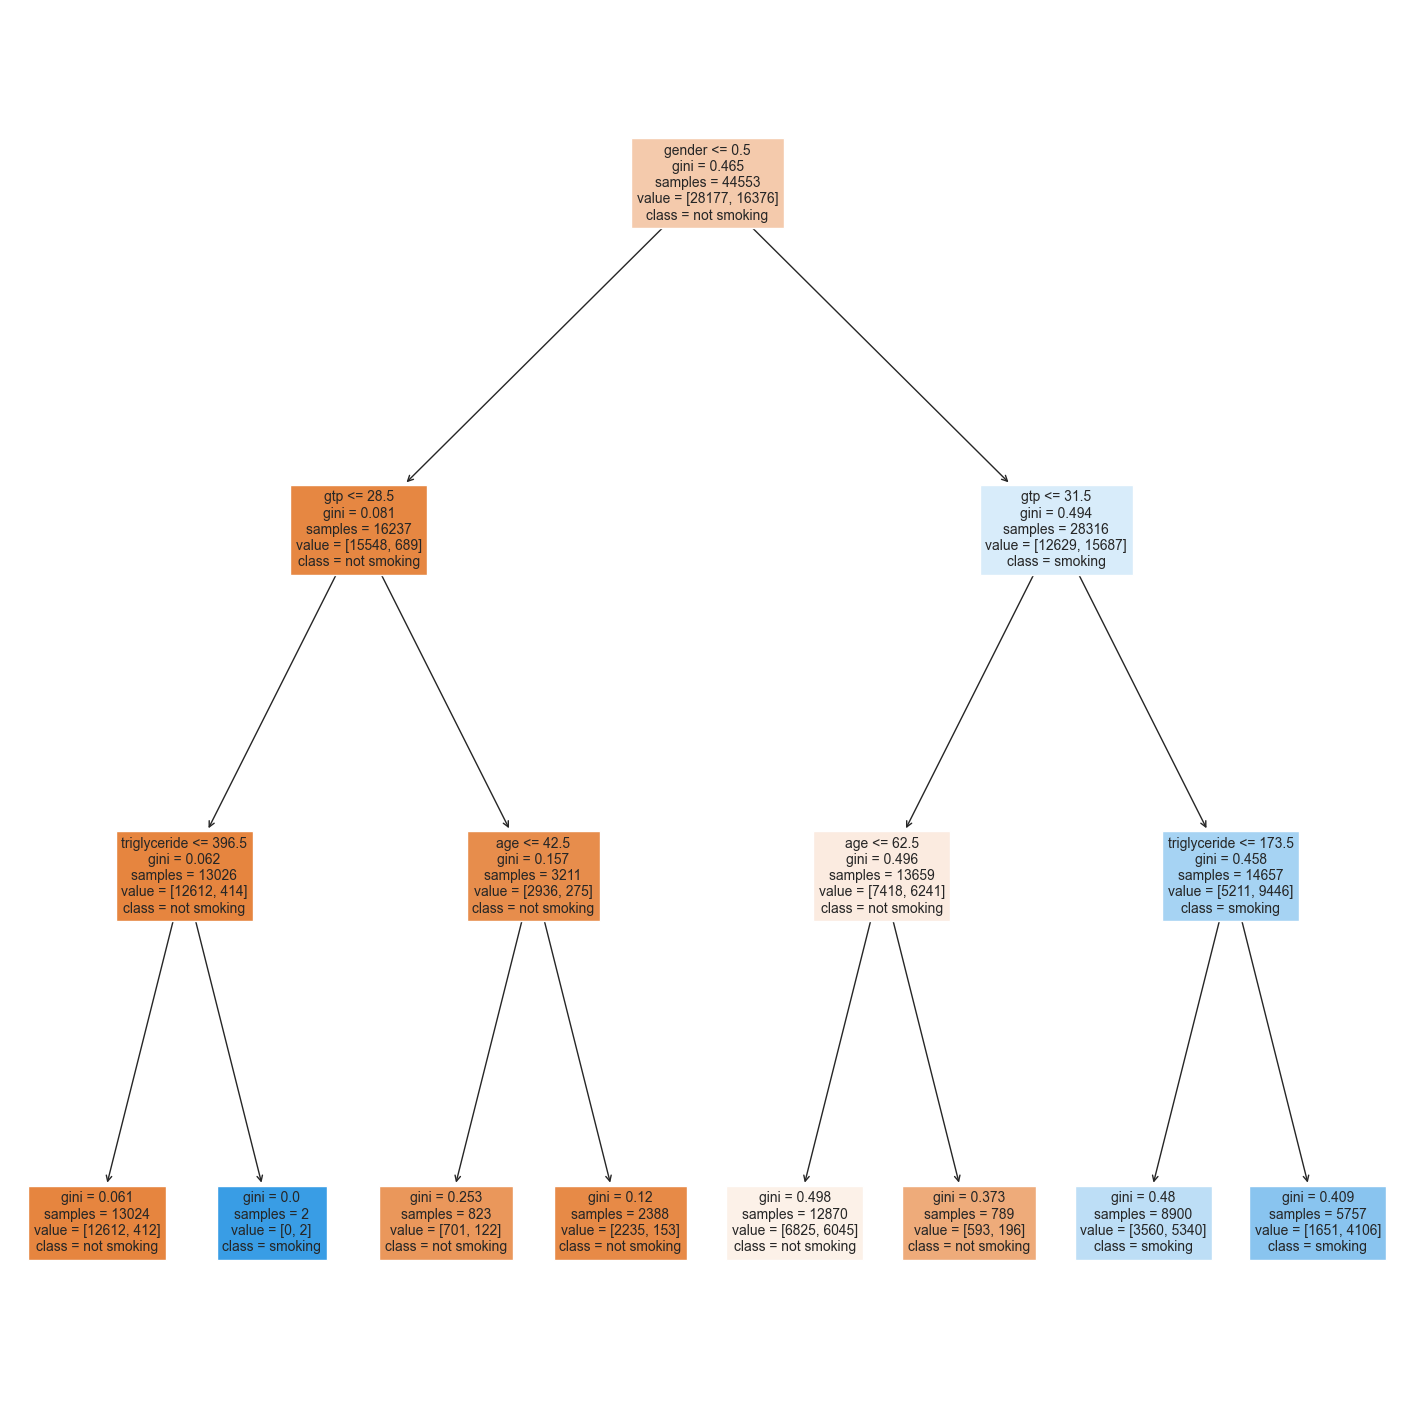

In [14]:
matplotlib.pyplot.figure(figsize=(18,18))
plot_tree(treemodel,feature_names = features,
          class_names=classNames,
          filled = True,fontsize=10)
matplotlib.pyplot.savefig('decisionTree.png')

In [15]:
decision_tree = DecisionTreeClassifier()
treemodel = decision_tree.fit(X_train, Y_train)
predictions_tree = treemodel.predict(X_test)
accuracy_score(test["smoking"], predictions_tree)

0.7877726905467277

In [16]:
#keep probabilities for the positive outcome only
y_pred_dt_prob = treemodel.predict_proba(X_test.values)[:,1]
fpr, tpr, _thresholds  = roc_curve(y_test, y_pred_dt_prob, pos_label=treemodel.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

c:\users\honza\appdata\local\programs\python\python39\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


NameError: name 'y_test' is not defined